In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


from sklearn.metrics import mean_squared_error, mean_absolute_error,explained_variance_score

In [2]:
# Customize Plots
rcParams['figure.figsize'] = 14,8
rcParams['axes.titlesize'] = 15
rcParams['font.size']=10
sns.set_style('whitegrid')

#show all columns in Jupyter Notebook
pd.set_option("display.max_columns", None)

In [3]:
inputs = pd.read_csv('inputs.csv',index_col=0)
df_Power = pd.read_csv('df_Power.csv',index_col=0)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(inputs.values,df_Power.values,test_size=0.2,random_state=101)

In [5]:
scaler = MinMaxScaler()

In [6]:
X_train = scaler.fit_transform(X_train)

In [7]:
X_test = scaler.transform(X_test)

In [8]:
X_train.shape

(36388, 37)

In [9]:
X_test.shape

(9097, 37)

In [10]:
model = Sequential()

model.add(Dense(37,activation='relu'))

model.add(Dense(37,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(37,activation='relu'))
model.add(Dropout(0.5))
# model.add(Dense(37,activation='relu'))
# model.add(Dropout(0.5))

model.add(Dense(20))


model.compile(optimizer='adam',loss='mse')

In [11]:
# - Hyperparameter Tunning:

batchsize = 256
epochs = 400

In [12]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [14]:
model.fit(x=X_train,
        y=y_train,
        validation_data=(X_test,y_test),
        batch_size=batchsize,
        epochs=epochs,
        verbose=1,
        callbacks=[early_stop])

Epoch 1/400
143/143 [==============================] - 2s 7ms/step - loss: 197386.0000 - val_loss: 167286.8594
Epoch 2/400
143/143 [==============================] - 1s 5ms/step - loss: 188918.0312 - val_loss: 165523.6562
Epoch 3/400
143/143 [==============================] - 1s 4ms/step - loss: 186451.7656 - val_loss: 162924.3594
Epoch 4/400
143/143 [==============================] - 1s 4ms/step - loss: 182954.7500 - val_loss: 159309.3438
Epoch 5/400
143/143 [==============================] - 1s 4ms/step - loss: 180932.9062 - val_loss: 158197.6094
Epoch 6/400
143/143 [==============================] - 1s 4ms/step - loss: 179923.8125 - val_loss: 157430.0156
Epoch 7/400
143/143 [==============================] - 1s 4ms/step - loss: 179332.0312 - val_loss: 157218.6406
Epoch 8/400
143/143 [==============================] - 1s 4ms/step - loss: 179558.0938 - val_loss: 157034.4688
Epoch 9/400
143/143 [==============================] - 1s 4ms/step - loss: 178716.0625 - val_loss: 156948.8594
E

In [15]:
losses = pd.DataFrame(model.history.history)

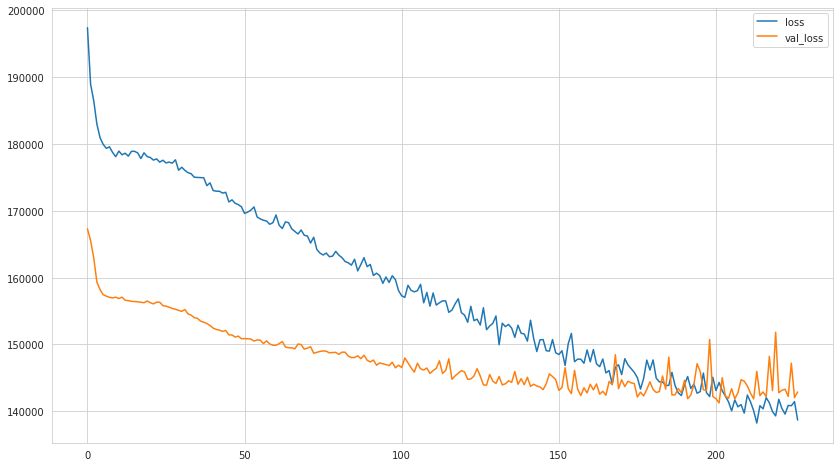

In [16]:
losses.plot()

In [17]:
def eval_metrics_timeseries(real_values,pred,name='Variable'):
    print(f"""
        ------- {name} ------
        
MAE: {mean_absolute_error(real_values,pred):.3f},
MSE: {mean_squared_error(real_values,pred):.3f},
RMSE: {np.sqrt(mean_squared_error(real_values,pred)):.3f},
Explained Variance Score: {explained_variance_score(real_values,pred)*100:.3f}%,

Compare Mean values per Year: Predictions VS Real:

{pd.concat([pd.DataFrame(real_values).mean(),pd.DataFrame(pred).mean()],axis=1,keys=['Avg real',' Avg Pred'],names='Year')}
    """)

In [18]:
predictions_Power = model.predict(X_test)

285/285 [==============================] - 1s 2ms/step


In [19]:
eval_metrics_timeseries(y_test,predictions_Power,name='Power Output (KW)')


        ------- Power Output (KW) ------
        
MAE: 140.704,
MSE: 142863.494,
RMSE: 377.973,
Explained Variance Score: 14.924%,

Compare Mean values per Year: Predictions VS Real:

Year    Avg real    Avg Pred
0     235.516815  199.300079
1     159.037330  149.054596
2     142.754770  136.877274
3     132.279116  128.797211
4     124.666695  122.654160
5     118.639608  117.789520
6     113.511415  113.747978
7     109.183204  110.286705
8     105.539911  107.255859
9     102.462820  104.615723
10     99.755893  102.300941
11     97.355710  100.245544
12     95.211355   98.455589
13     93.310488   96.827507
14     91.637579   95.392784
15     90.086503   94.105255
16     88.629380   92.825081
17     87.246608   91.710747
18     85.964395   90.612358
19     84.780345   89.635361
    


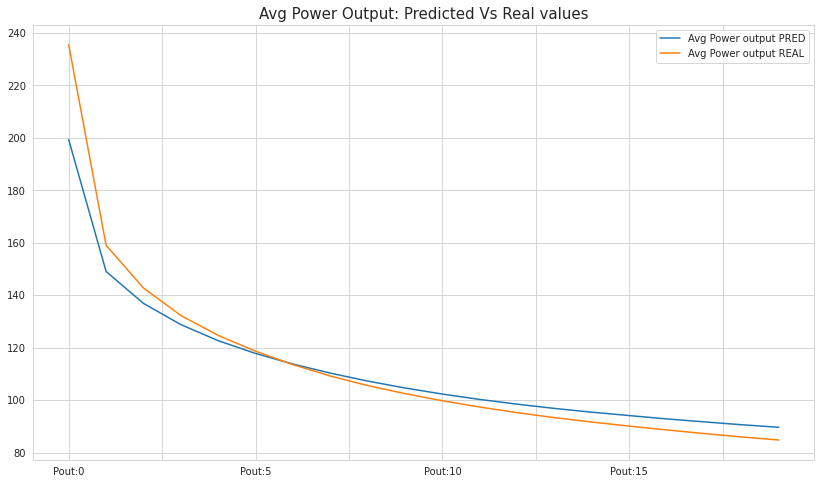

In [20]:
pd.DataFrame(predictions_Power,columns=df_Power.columns).mean().plot(legend=True,label='Avg Power output PRED',
                                                                           title='Avg Power Output: Predicted Vs Real values')
pd.DataFrame(y_test,columns=df_Power.columns).mean().plot(legend=True,label='Avg Power output REAL')